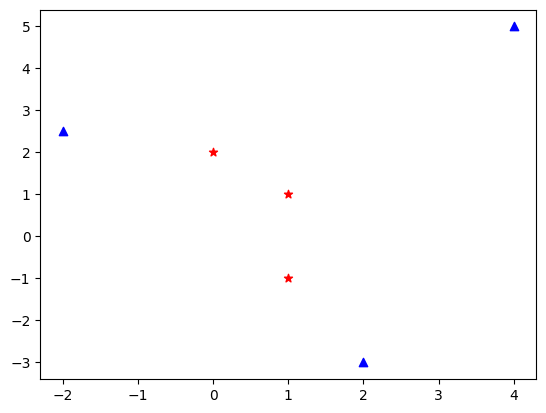

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('test-Minimum-Error-Rate-Classifier.txt',sep=',',header=None)
data=data.values


mu1=np.array([0,0])
mu2=np.array([2,2])

sigma1=np.array([[.25,.3],[.3,1]])
sigma2=np.array([[.5,0],[0,.5]])


prior1= prior2 = .5


def norm_dist(x, mu, sigma):
    d = len(mu)
    sig_inv = np.linalg.inv(sigma)
    sig_det = np.linalg.det(sigma)
    const = (np.power(2 * np.pi, d / 2) * np.sqrt(sig_det))
    const= 1 / const
    x_mu = x - mu
    exponent = -0.5 * np.dot(x_mu.T, np.dot(sig_inv, x_mu))
    return const * np.exp(exponent)

classified = []
for x in data:
    likelihood1 = norm_dist(x, mu1, sigma1)
    likelihood2 = norm_dist(x, mu2, sigma2)

    g1 = likelihood1
    g2 = likelihood2
    #print(x, g1 ," ", g2)

    if g1 > g2:
        classified.append([1])
        plt.scatter(x[0], x[1], marker="*", color= "red")
        #print(g1)
    else:
        classified.append([x[0], x[1],2])
        plt.scatter(x[0], x[1], marker="^", color= "blue")
        #print(g2)

# for i in classified:
#     print(i)


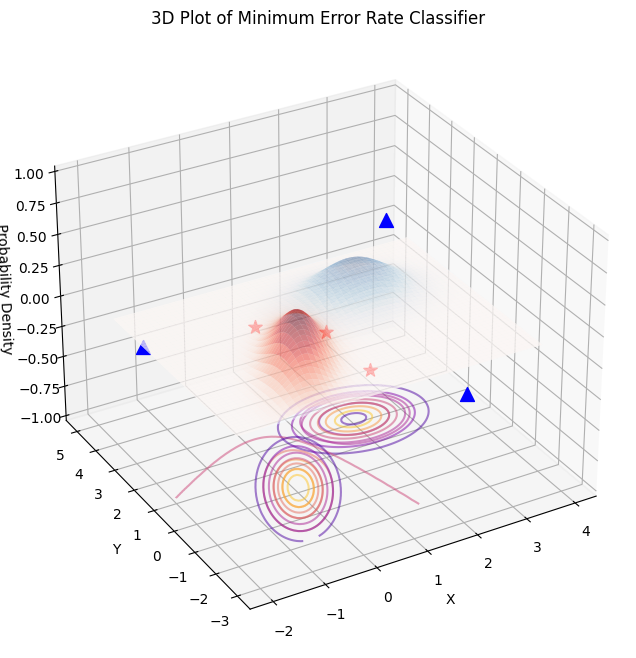

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from matplotlib import cm

x = np.linspace(-2, 4, 100)
y = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


pdf1 = multivariate_normal(mu1, sigma1).pdf(pos)
pdf2 = multivariate_normal(mu2, sigma2).pdf(pos)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.contour(X, Y, pdf1, zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.5)
ax.contour(X, Y, pdf2, zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.5)


ax.plot_surface(X, Y, pdf1, cmap='Reds', alpha=0.5, label='PDF Class 1')

ax.plot_surface(X, Y, pdf2, cmap='Blues', alpha=0.5, label='PDF Class 2')
ax.contour(X, Y, pdf1-pdf2, zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.5)

# Scatter plot for data points
for x in data:
    # Calculate discriminant functions g1 and g2
    likelihood1 = multivariate_normal(mu1, sigma1).pdf(x)
    likelihood2 = multivariate_normal(mu2, sigma2).pdf(x)

    g1 = likelihood1
    g2 = likelihood2

    # Classify based on which discriminant function is larger
    if g1 > g2:
        ax.scatter(x[0], x[1], 0, marker='*', color='red', s=100)
    else:
        ax.scatter(x[0], x[1], 0, marker='^', color='blue', s=100)

ax.set_zlim3d(-1,1)
ax.view_init(azim=240)

# Adjust labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('3D Plot of Minimum Error Rate Classifier')

plt.show()